# k-Fold Cross Validation




## k-Fold Cross Validation

**K-Fold Cross-Validation** is a crucial method for evaluating model performance more reliably than a simple train-test split. It mitigates the chances of overfitting to a specific test set.

**Two Approaches:**
1. **Without a Separate Test Set:** Perform k-fold cross-validation on the entire dataset, eliminating the need for a separate test set.
2. **With a Separate Test Set (Preferred):**
  - **Step 1:** Split the dataset into a training set and a test set.
  - **Step 2:** Apply k-fold cross-validation on the training set:
    - Divide the training data into *k* equal folds (commonly *k=10*).
    - For each fold:
      - Train the model on *k-1* folds.
      - Validate on the remaining fold.
      - Record performance metrics.
    - The hyperparameters used in each of the trainings must be the same.
  - **Step 3:** Aggregate the metrics from all folds to assess overall model performance.
  - **Step 4:** If metrics are satisfactory, train the final model on the entire training set and evaluate it on the test set. If not, adjust hyperparameters or modify the model and repeat the process.

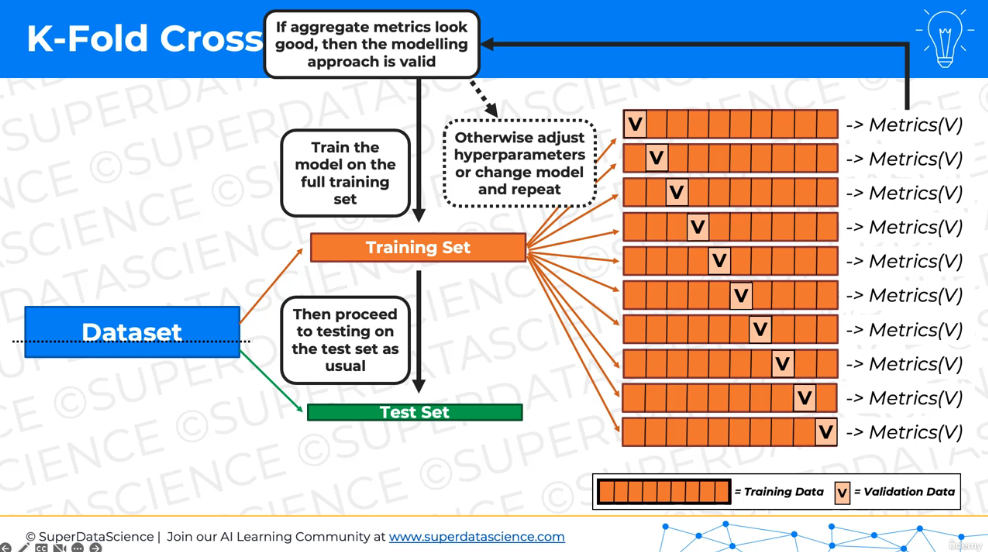


**Benefits of K-Fold Cross-Validation:**
- Reduces the risk of the model performing well only on a particular test set by averaging performance across multiple folds.
- Provides a more comprehensive evaluation by using different subsets of data for training and validation.


**Different approaches to using k-fold cross validation:**

There are several approaches to using k-fold cross-validation:

1. **Traditional Approach**: Split the data into a training and test set. Apply k-fold cross-validation on the training set, assess the metrics, retrain the model on the entire training set if satisfied, and then test on the test set.

2. **Skip the Test Step**: After using k-fold cross-validation on the training set and obtaining metrics, skip the testing step, as the model has already been validated.

3. **Select from K-Fold Models**: After performing k-fold cross-validation, pick one of the trained models instead of retraining. This can be challenging since you need to choose the best model based on metrics.

4. **K-Fold as an Add-On**: First, apply the classic method (train-test split), and if the results are satisfactory, add k-fold cross-validation afterward to confirm the model's performance wasn’t due to chance.

The approach chosen depends on your goals, but the key is understanding why you're using it and ensuring there's no data leakage between the training, validation, and test sets.

## Bias-Variance Tradeoff
Understanding the bias-variance tradeoff is crucial for model development, and combining this understanding with techniques like K-fold cross-validation enhances model evaluation.

The goal is to find a balance that minimizes both bias and variance for optimal model performance.

**Definitions:**
  - **Bias:** A systematic error in the model due to incorrect assumptions. Tehnically, it represents the difference between average model predictions and actual outcomes.
    - **High bias** indicates the model is too simple and fails to capture data trends.
  - **Variance:** How much the model can adjust depending on the given data set. It refers to the changes in the model when using different portions of the training data set.
    - **High variance** means the model is overly sensitive to data noise, leading to overfitting.

**Bias-Variance Curve Visualization:**
   - **High Bias, Low Variance:** Predictions are clustered but far from the target, indicating a too-simple model.
   - **Low Bias, High Variance:** Predictions average near the target but vary significantly, indicating overfitting.
   - **High Bias, High Variance:** Predictions are scattered and far from the target, representing the worst-case scenario.
   - **Ideal Scenario:** Low bias and low variance, where predictions cluster around the target, accurately reflecting the underlying data trends.



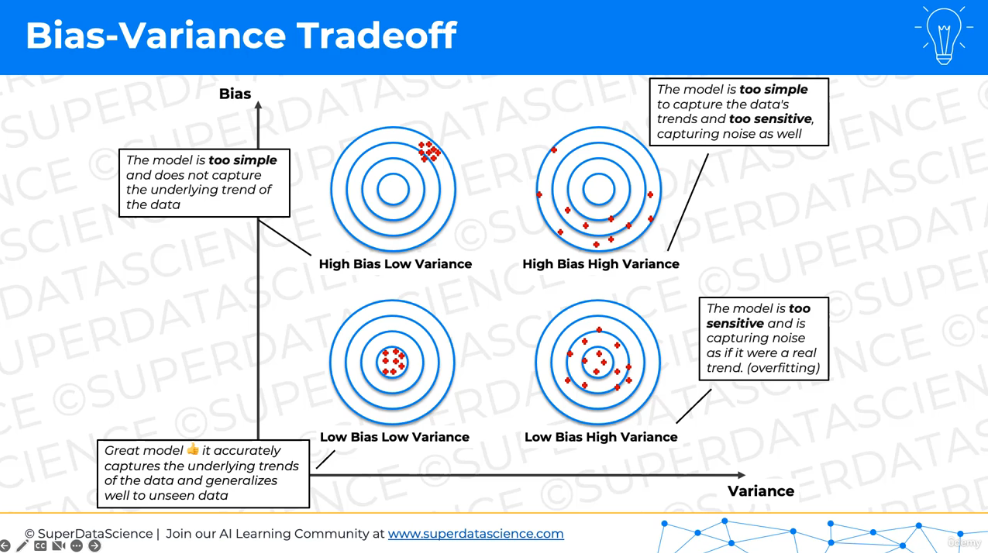


**Tradeoffs:**
- Achieving a perfect model (low bias, low variance) is rare, often resulting in trade-offs between model complexity and performance. A complex model may fit well but capture noise, while a simpler model may fail to capture key data trends.
- Usually, we will be between “High Bias Low Variance” option (too simple model) and “Low Bias High Variance” option (too complex model).

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

Instead of building a new model, we will use the previously built Kernel SVM model from "Part 3 - Classification" to apply k-fold cross-validation. This model was developed to predict whether customers would click on an ad for an SUV.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 10 - Model Selection & Boosting/1 Model Selection/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

Standardize the training and testing datasets, `X_train` and `X_test`, by scaling them to have a mean of 0 and a standard deviation of 1 using `StandardScaler`.

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

The confusion matrix indicates:

- **True Positives (TP)**: 29
- **True Negatives (TN)**: 64
- **False Positives (FP)**: 4
- **False Negatives (FN)**: 3

The accuracy of the model is **0.93** (or 93%), meaning that 93% of the predictions made by the model are correct.

## Applying k-Fold Cross Validation

In [8]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training set using the specified classifier
# 'cv = 10' means using 10-fold cross-validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

# Print the accuracies vector composed of 10 accuracies of each of the folds
print(accuracies)

# Print the mean accuracy of the cross-validation results as a percentage
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# Print the standard deviation of the accuracies from cross-validation results as a percentage
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[0.8        0.96666667 0.8        0.96666667 0.86666667 0.86666667
 0.9        0.93333333 1.         0.93333333]
Accuracy: 90.33 %
Standard Deviation: 6.57 %


**Discussion about the results of a k-fold cross-validation:**
- The accuracies from the 10 folds varied significantly (ranging from 80% to 96%). This variability demonstrates that evaluating model performance on a single test set may not be reliable. By using k-fold cross-validation, the model is tested across multiple subsets, allowing for a more robust assessment.
- The mean accuracy of these 10 tests is calculated to be 90%, which is considered the relevant evaluation of the model's performance, rather than relying on individual accuracies like 80% or 96%.

## Visualising the Training set results

<ipython-input-9-119e61465880>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


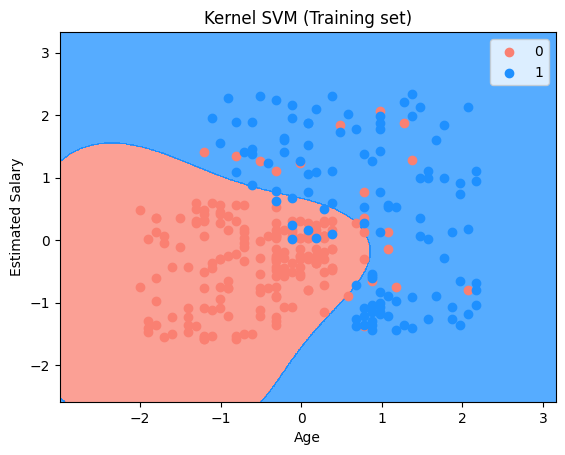

In [9]:
from matplotlib.colors import ListedColormap

# Set X_set and y_set to the training data
X_set, y_set = X_train, y_train

# Create a mesh grid for the feature space based on the range of the first two features
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Plot the decision boundary using contour fill based on classifier predictions
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))

# Set axis limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot the training data points, colored by their class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)

plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-10-4e2af6e9f16d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


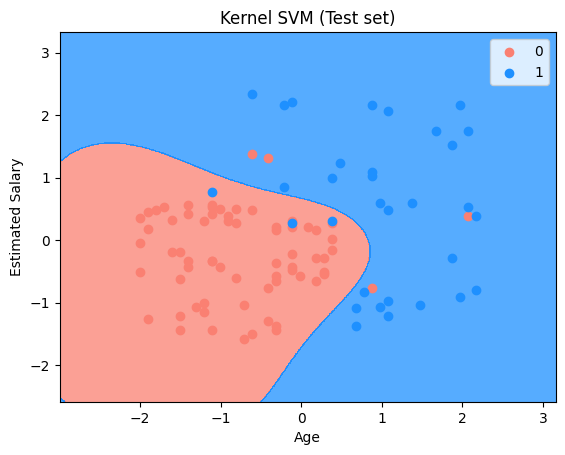

In [10]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)

plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()